In [43]:
!pip install rdp
!pip install pandas-datareader

In [3]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from rdp import rdp
import yfinance as yf

In [38]:
def rdp(points, epsilon):
    """Ramer-Douglas-Peucker line simplification algorithm."""
    dmax = 0
    index = 0
    end = len(points) - 1
    for i in range(1, end):
        d = point_to_line_distance(points[i], points[0], points[end])
        if d > dmax:
            index = i
            dmax = d
    if dmax > epsilon:
        results1 = rdp(points[:index+1], epsilon)
        results2 = rdp(points[index:], epsilon)
        return np.vstack((results1[:-1], results2))
    else:
        return np.vstack((points[0], points[end]))

def point_to_line_distance(point, line_start, line_end):
    """Compute the distance between a point and a line."""
    return np.abs(np.cross(line_end - line_start, line_start - point)) / np.linalg.norm(line_end - line_start)



In [39]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get data for microsoft
tickerDf = tickerData.history(period='1d', start='2023-1-1', end='2023-3-31')

df = tickerDf

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,242.472686,245.136013,236.806869,238.981430,25740000,0.0,0.0
2023-01-04 00:00:00-05:00,231.699666,232.288188,225.395464,228.527618,50623400,0.0,0.0
2023-01-05 00:00:00-05:00,226.632344,226.981476,221.205933,221.754562,39585600,0.0,0.0
2023-01-06 00:00:00-05:00,222.442841,225.195940,218.801966,224.368011,43613600,0.0,0.0
2023-01-09 00:00:00-05:00,225.884227,230.662268,225.844334,226.552551,27369800,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-24 00:00:00-04:00,277.239990,280.630005,275.279999,280.570007,28172000,0.0,0.0
2023-03-27 00:00:00-04:00,280.500000,281.459991,275.519989,276.380005,26840200,0.0,0.0
2023-03-28 00:00:00-04:00,275.790009,276.140015,272.049988,275.230011,21878600,0.0,0.0


Enter Epsilon value: 5


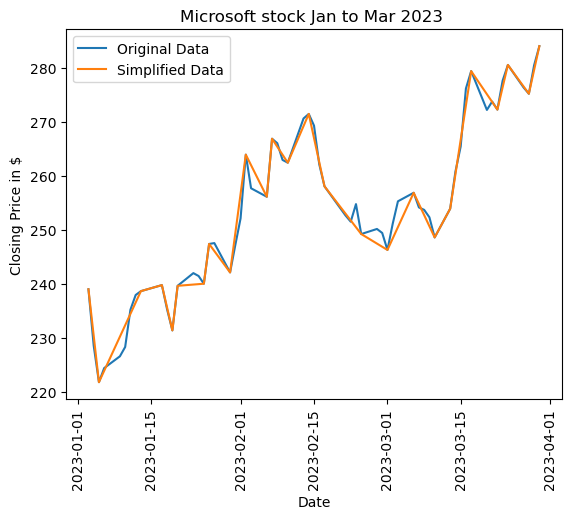

In [41]:
input_epsilon = int(input('Enter Epsilon value: '))

# Simplify the stock data using the RDP algorithm
points = np.column_stack((pd.to_datetime(df.index).map(pd.Timestamp.timestamp), df['Close']))
simplified_points = rdp(points, epsilon= input_epsilon)

# Plot the original and simplified stock data
plt.plot(df.index, df['Close'], label='Original Data')
plt.plot(pd.to_datetime(simplified_points[:,0], unit='s'), simplified_points[:,1], label='Simplified Data')
plt.title('Microsoft stock Jan to Mar 2023 ')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Closing Price in $')
plt.legend()
plt.show()


Enter Epsilon value: 8


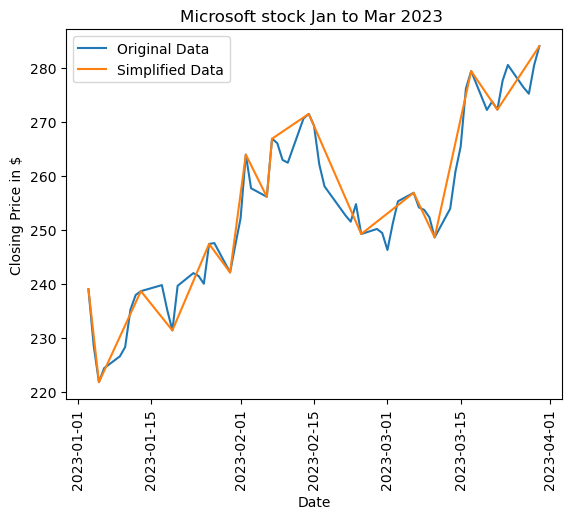

In [42]:
input_epsilon = int(input('Enter Epsilon value: '))

# Simplify the stock data using the RDP algorithm
points = np.column_stack((pd.to_datetime(df.index).map(pd.Timestamp.timestamp), df['Close']))
simplified_points = rdp(points, epsilon= input_epsilon)

# Plot the original and simplified stock data
plt.plot(df.index, df['Close'], label='Original Data')
plt.plot(pd.to_datetime(simplified_points[:,0], unit='s'), simplified_points[:,1], label='Simplified Data')
plt.title('Microsoft stock Jan to Mar 2023 ')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Closing Price in $')
plt.legend()
plt.show()